<div class="alert alert-block alert-info" style="margin-top: 20px">
 <a href="http://cocl.us/pytorch_link_top"><img src = "http://cocl.us/Pytorch_top" width = 950, align = "center"></a>

<img src = "https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width = 200, align = "center">


<h1 align=center><font size = 5>Softmax Classifer </font></h1> 


# Table of Contents
In this lab, you will use a single layer Softmax to classify handwritten digits from the MNIST database.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Helper functions</a></li>

<li><a href="#ref1">Prepare Data</a></li>
<li><a href="#ref2">Softmax Classifier</a></li>
<li><a href="#ref3">Define Softmax, Criterion Function, Optimizer, and Train the Model</a></li>
<li><a href="#ref4">Analyze Results</a></li>

<br>
<p></p>
Estimated Time Needed: <strong>25 min</strong>
</div>

<hr>

<a id="ref0"></a>
<h2 align=center>Helper functions </h2>

In [3]:
#!conda install -y torchvision
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

Use the following function to plot out the parameters of the Softmax function:

In [4]:
def PlotParameters(model): 
    W=model.state_dict() ['linear.weight'].data
    w_min=W.min().item()
    w_max=W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i,ax in enumerate(axes.flat):
        if i<10:
             # Set the label for the sub-plot.
            ax.set_xlabel( "class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i,:].view(28,28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])
        
        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

Use the following function to visualize the data: 

In [5]:
def show_data(data_sample):

    plt.imshow(data_sample[0].numpy().reshape(28,28),cmap='gray')
    #print(data_sample[1].item())
    plt.title('y= '+ str(data_sample[1].item()))

<a id="ref1"></a>
<h2 align=center>Prepare Data </h2> 

Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [6]:
train_dataset=dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

Load the testing dataset by setting the parameters train <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.

In [7]:
validation_dataset=dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
validation_dataset

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

You can see that the data type is long:

In [8]:
train_dataset[0][1].type()

'torch.LongTensor'

### Data Visualization 

Each element in the rectangular tensor corresponds to a number that represents a pixel intensity as demonstrated by the following image:

<img src = "https://ibm.box.com/shared/static/7024mnculm8w2oh0080y71cpa48cib2k.png" width = 550, align = "center"></a>

Print out the third label:

In [9]:
train_dataset[3][1]

tensor(1)

Plot the 3rd sample:

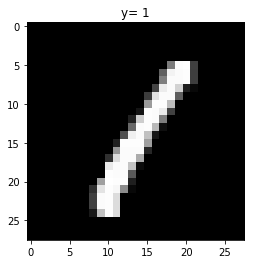

In [10]:
show_data(train_dataset[3])

You see that it is a 1. Now, plot the second sample:

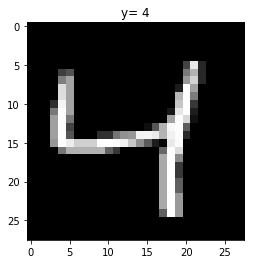

In [11]:
show_data(train_dataset[2])

<a id="ref3"></a>
### Build a Softmax Classifer 

Build a Softmax classifier class: 

In [12]:
class SoftMax(nn.Module):
    def __init__(self,input_size,output_size):
        super(SoftMax,self).__init__()
        self.linear=nn.Linear(input_size,output_size)
    def forward(self,x):
        z=self.linear(x)
        return z

The Softmax function requires vector inputs. Note that the vector shape is 28x28.

In [13]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

Flatten the tensor as shown in this image: 

<img src = "https://ibm.box.com/shared/static/0cjl5inks3d8ay0sckgywowc3hw2j1sa.gif" width = 550, align = "center"></a> 

The size of the tensor is now 784.

<img src = "https://ibm.box.com/shared/static/lhezcvgm82gtdewooueopxp98ztq2pbv.png" width = 550, align = "center"></a>

Set the input size and output size: 

In [14]:
input_dim=28*28
output_dim=10
input_dim

784

<a id="ref3"></a>
<h2> Define the Softmax Classifier, Criterion Function, Optimizer, and Train the Model</h2> 

In [15]:
model=SoftMax(input_dim,output_dim)
model

SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

View the size of the model parameters: 

In [16]:
print('W:',list(model.parameters())[0].size())
print('b',list(model.parameters())[1].size())

W: torch.Size([10, 784])
b torch.Size([10])


You can cover the model parameters for each class to a rectangular grid:  


<a>     <img src = "https://ibm.box.com/shared/static/9cuuwsvhwygbgoogmg464oht1o8ubkg2.gif" width = 550, align = "center"></a> 

Plot the model parameters for each class: 

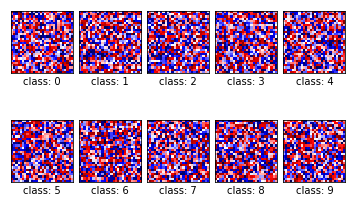

In [17]:
PlotParameters(model)

Loss function: 

In [18]:
criterion=nn.CrossEntropyLoss()

Optimizer class:

In [19]:
learning_rate=0.1
optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

Define the dataset loader: 

In [20]:

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=100)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)

Train the model and determine validation accuracy **(should take a few minutes)**: 

In [21]:
n_epochs=10
loss_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
#n_epochs
for epoch in range(n_epochs):
    for x, y in train_loader:
      

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x.view(-1,28*28))
        # calculate loss 
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        
        
        
    correct=0
    #perform a prediction on the validation  data  
    for x_test, y_test in validation_loader:

        z=model(x_test.view(-1,28*28))
        _,yhat=torch.max(z.data,1)

        correct+=(yhat==y_test).sum().item()
        
   
    accuracy=correct/N_test

    accuracy_list.append(accuracy)
    
    loss_list.append(loss.data)
    accuracy_list.append(accuracy)

<a id="ref3"></a>
<h2 align=center>Analyze Results</h2> 

Plot the loss and accuracy on the validation data:

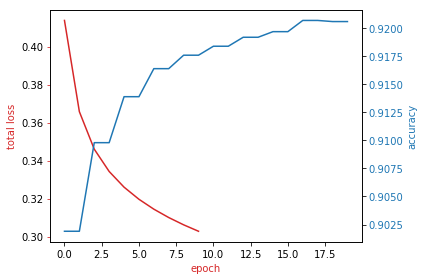

In [22]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

View the results of the parameters for each class after the training. You can see that they look like the corresponding numbers. 

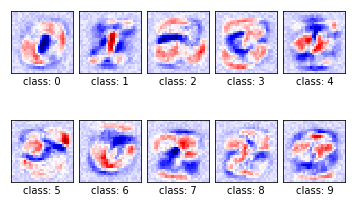

In [23]:
PlotParameters(model)

Plot the first five misclassified samples:

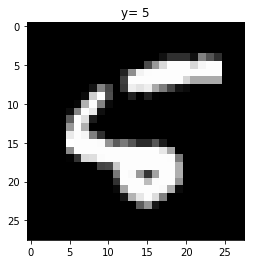

yhat: tensor([6])


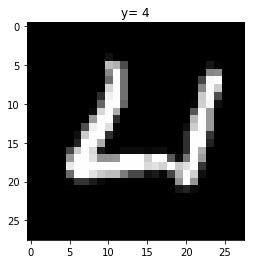

yhat: tensor([6])


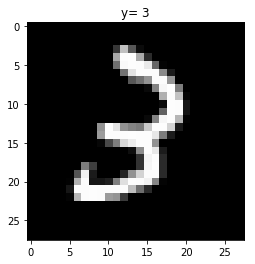

yhat: tensor([2])


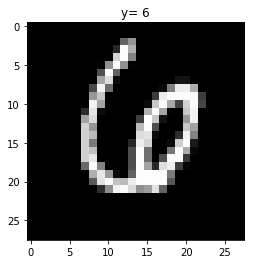

yhat: tensor([7])


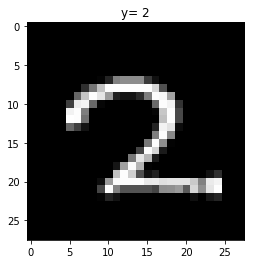

yhat: tensor([7])


In [24]:
count=0
for x,y in validation_dataset:

    z=model(x.reshape(-1,28*28))
    _,yhat=torch.max(z,1)
    if yhat!=y:
        show_data((x,y))

        plt.show()
        print("yhat:",yhat)
        count+=1
    if count>=5:
        break 
        

### About the Authors:  
[Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. 

Other contributors: [Michelle Carey](  https://www.linkedin.com/in/michelleccarey/), [Mavis Zhou](  https://www.linkedin.com/in/jiahui-mavis-zhou-a4537814a/) 

<hr>

Copyright &copy; 2018 [cognitiveclass.ai](cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).